# Prereading

## Smoothing Matrices

The least squares estimate $\hat \beta = (X^TX)^{-1}X^Ty$ provides $X\hat \beta = X(X^TX)^{-1}X^Ty = H_{n \times n}y = \hat y \approx y$  where the exactness of the approximation is determined by the (hopefully somewhat familar) $H_{n \times n}$ **hat matrix**.

The **hat matrix** is determined by the choice of ***basis functions*** defining the **design matrix** $X$, e.g., 

$$X\beta = \underset{\text{traditional modeling}}{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)} \quad \text{ or } \quad \underset{\text{B-spline modeling}}{X\beta = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j)}$$

Alternatively however, the **hat (projection) matrix** $H$ may be replaced with ***smoothing matrix*** $S$ parameterized by ***positive definite*** $A$ and ***penalty parameter*** $\lambda$ such that

$$\hat y = \underbrace{(I + \lambda A)^{-1}}_{S_{n \times n}} y \quad y^T A y \geq 0, \lambda \geq 0 $$

which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ and which also solves the **penalized least squares** problem

$$\nabla_{\hat y} \left(\underset{\text{$\hat y_i$ with close $x_i$ should be close}}{\overset{\text{Penalized Least Squares: $A$ means}}{(y-\hat y)^T(y-\hat y) + \lambda \hat y^T \!\!A \hat y}} \right) = -2y + 2\hat y + 2 \lambda A \hat y = 0$$

### LOESS, LOWESS, and cubic smoothing splines

[LOESS and LOWESS](https://en.wikipedia.org/wiki/Local_regression) and [cubic smoothing splines](https://en.wikipedia.org/wiki/Smoothing_spline#Derivation_of_the_cubic_smoothing_spline)  implicitly induce a smoothing matrix $S$ based on local averaging which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ on the basis of weights which decay as the distance beween features $\mathbf x_i$ and $\mathbf x_{j \not = i}$ increases. 

Since the weights decay to $0$, the application of the **smoothing matrix** to $y$ is naturally [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) operation.
Both **LOESS and LOWESS** use locally-weighted polynomial regression, so each $\hat y_i$ has an interpretation as a weightd least squares estimate 

$$(X^TW_iX)^{-1} XW_iy$$

**Cubic smoothing splines** are defined as  

$${f}_\lambda = \underset{ f}{\text{argmin}} \sum _{i=1}^{n}\{y_{i}-{ {f}}(x_{i})\}^{2}+\lambda \int { {f}}''(x)^{2}\,dx$$

and their name from the fact their optimal solution for each $\lambda$ is actually a [natural cubic spline](https://en.wikipedia.org/wiki/Spline_(mathematics)#Algorithm_for_computing_natural_cubic_splines) (with knots $z_i$ at every observed value of $x_i$ and third-order coefficients whose magnitudes are penalized by $\lambda$). 


In [3]:
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

In [4]:
housing = fetch_california_housing()
y = housing.target
x = range(0, len(y))


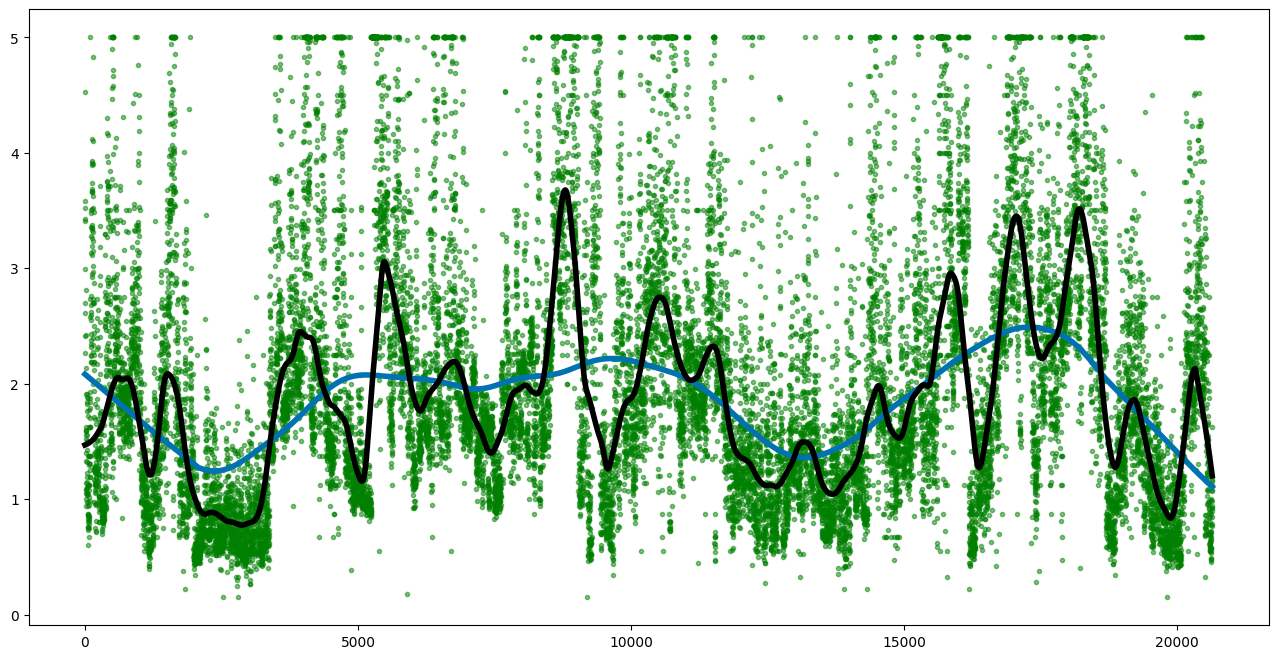

In [6]:
lowess = sm.nonparametric.lowess
plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c='g', alpha=0.5)
z = lowess(y, x, frac=20/100)
plt.plot(*z.T, linewidth=4)
z = lowess(y, x, frac=3/100)
plt.plot(*z.T, c='k', linewidth=4);

## Smoothing matrix basis function representations

**Smoothing matrices** $S$ can be seen to be **idempotent** (so $SS=S$) whenever $A \hat y = 0$ by the **Sherman-Morrison-Woodbury** (matrix inversion) formula

$$SS y  =  S \hat y = (\underset{\,\large A + UCV}{I + 1 \lambda A})^{−1} \hat y = \left[ I − (\lambda^{-1} + A)^{−1} A \right] \hat y \overset{A \hat y= 0}{=} \hat y = S y $$

An **idempotent** matrix has only $0$ or $1$ valued **eigenvalues** $\lambda_i$,
and thus the **rank** of **smoothing matrix** $S$ can be measured as $\textrm{trace}(S) = \sum \lambda_i$. 

> More generally, **eigenvalues** of a **smoothing matrix** will satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$.

Unlike the **hat matrix** $H$, the **smoothing matrix** $S$ is not necessarily **symmetric** but if it is is both  **symmetric** and **idempotent** then it is also a **projection matrix** (like $H$).  The **hat matrix** spans (projects onto) the range (column space) of $X$, whereas a  **symmetric idempotent smoothing matrix** $S_{n\times n} = (I + \lambda A)^{-1} = V_{n\times p}D_{p\times p}V_{n\times p}^T$ then spans the range of the columns of $V$ and $\hat y$ is given by the coordinate $\tilde \beta_{p\times 1} = D_{p\times p}V_{n\times p}^Ty$ with respect to the basis formed by the columns of $V$.






# Lecture

First hour of class

## Splines

---

> - Even though the optimal function ${f}_\lambda^{*}$ for ***cubic smoothing splines*** is a ***natural cubic spline***, it is not one created from the ***hat matrix*** $H = X(X^TX)^{-1}X^T$ for some ***design matrix*** $X$ constructed from ***natural cubic spline basis functions***.
>    - Using $n$ knots would produce more parameters than data points, so the ***hat matrix*** $H$ would then perfectly fit the data corresponding to a ***cubic smoothing splines*** with $\lambda = 0$ which induces no penalization on the magnitude third-order coefficients.
> - The ***natural cubic spline*** fit ${f}_\lambda^{*}$ for ***cubic smoothing splines*** is obtained as the solution to a ***penalized least squares*** "smoothing" problem $\hat y = {(I + \lambda A)^{-1}} y\; (y^T A y \geq 0, \lambda \geq 0)$ for ***smoothing matrix*** $S$ and not through a ***design matrix*** $X$ based on ***natural cubic splines*** which would imply a "hat matrix" for a ***least squares*** problem $\hat y = Hy = X(X^TX)^{-1}X^Ty$. 
>    - ***Smoothing matrices*** induce an optimal solution to a ***penalized least squares*** problem, while ***spline basis functions*** specify a ***least squares*** problem. 

In [93]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from patsy import dmatrix, bs, build_design_matrices
import statsmodels.api as sm
import pandas as pd
plt.style.use('seaborn-v0_8-colorblind')